In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import shap
import numpy as np

from MOBPY.MOB import MOB
from MOBPY.plot.MOB_PLOT import MOB_PLOT

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

## Import Data and create training and testing datasets

In [2]:
credit_data= pd.read_csv('GiveMeSomeCredit/cs-training.csv', index_col=0)

In [3]:
 credit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [4]:
credit_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [5]:
credit_data['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [6]:
print('No Serious Delinquencies', round(credit_data['SeriousDlqin2yrs'].value_counts()[0]/len(credit_data) * 100,2), '% of the dataset')
print('Serious Delinquencies', round(credit_data['SeriousDlqin2yrs'].value_counts()[1]/len(credit_data) * 100,2), '% of the dataset')

No Serious Delinquencies 93.32 % of the dataset
Serious Delinquencies 6.68 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Serious Delinquencies || 1: Serious Delinquencies)')

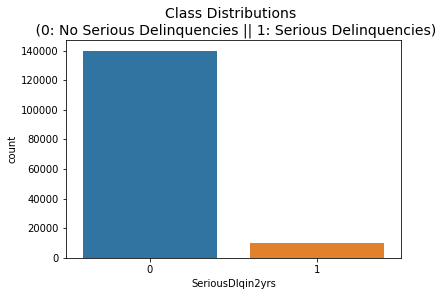

In [7]:
sns.countplot(x='SeriousDlqin2yrs', data=credit_data)
plt.title('Class Distributions \n (0: No Serious Delinquencies || 1: Serious Delinquencies)', fontsize=14)

In [8]:
credit_data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

## Exploratory Data Analysis

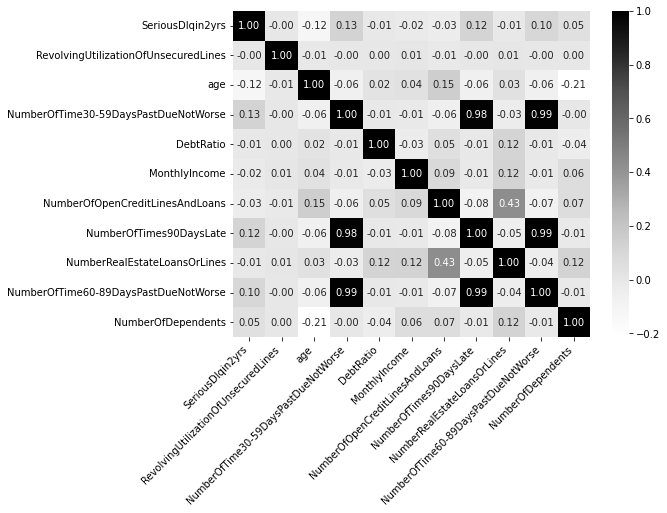

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(credit_data.corr(), annot=True, cmap="Greys", fmt=".2f", cbar=True)
plt.xticks(rotation=45, ha='right') 
plt.show()

In [10]:
sampled_data = credit_data.sample(n=1000, random_state=42)

<Figure size 1080x720 with 0 Axes>

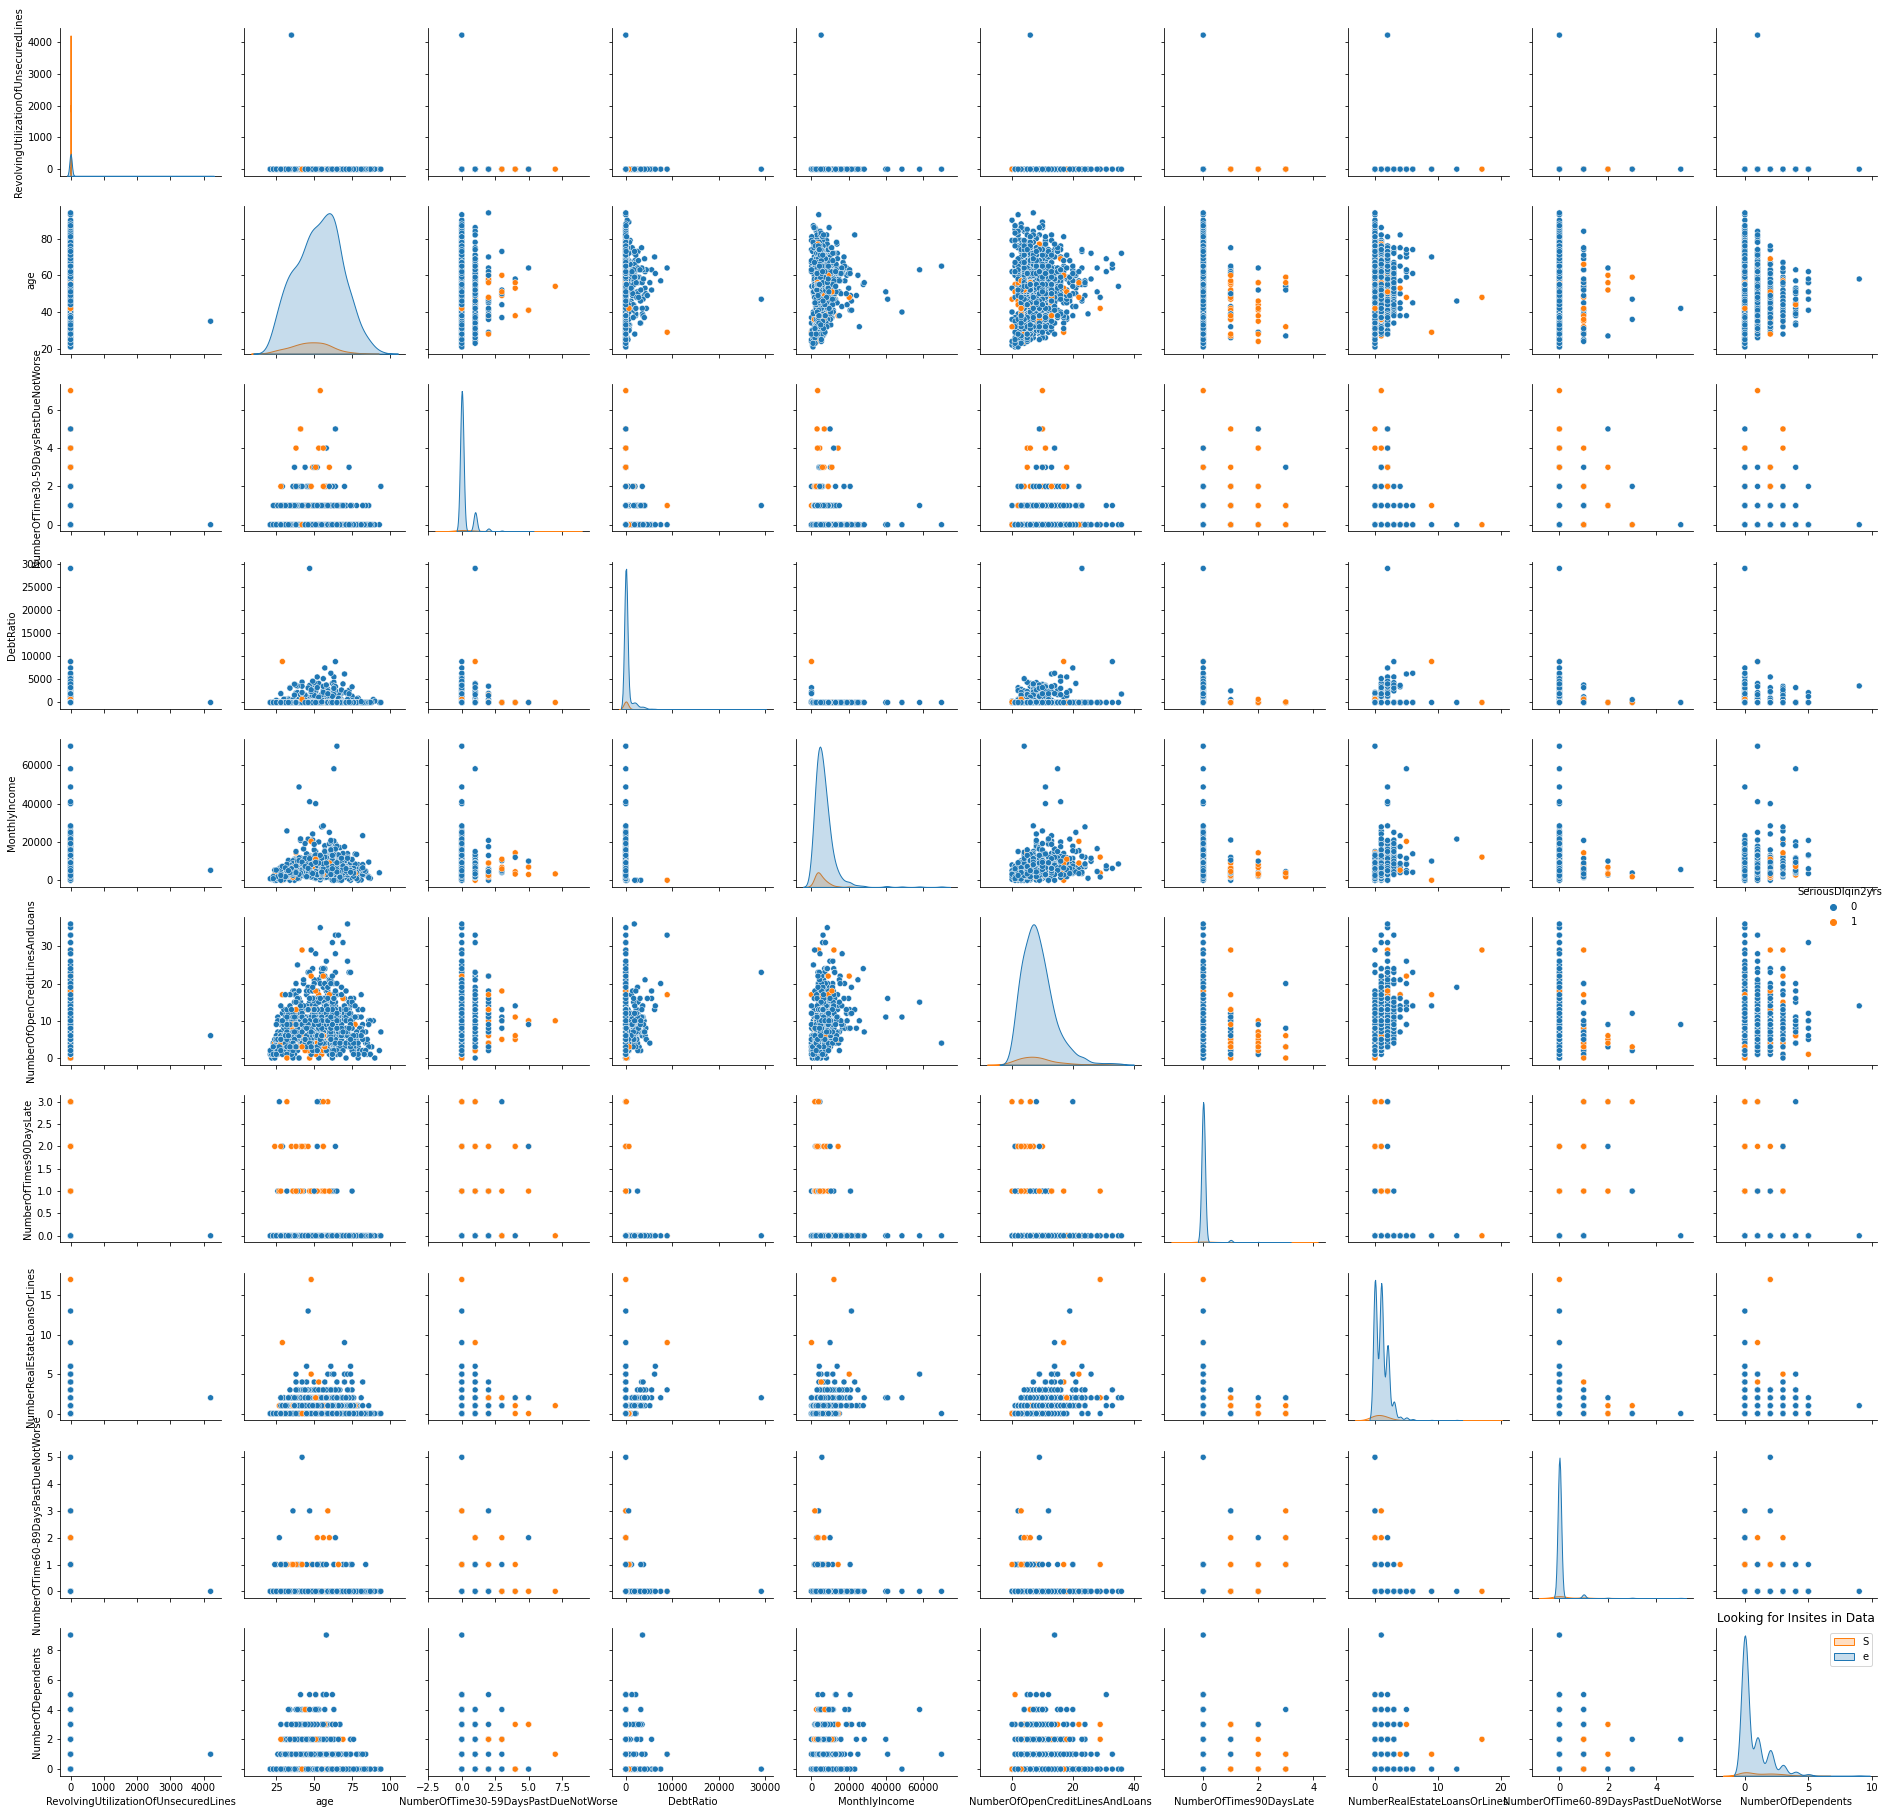

In [11]:
plt.figure(figsize=(15,10))
sns.pairplot(sampled_data,hue="SeriousDlqin2yrs")
plt.title("Looking for Insites in Data")
plt.tight_layout()
plt.legend("SeriousDlqin2yrs")



## Outliersdf.info()

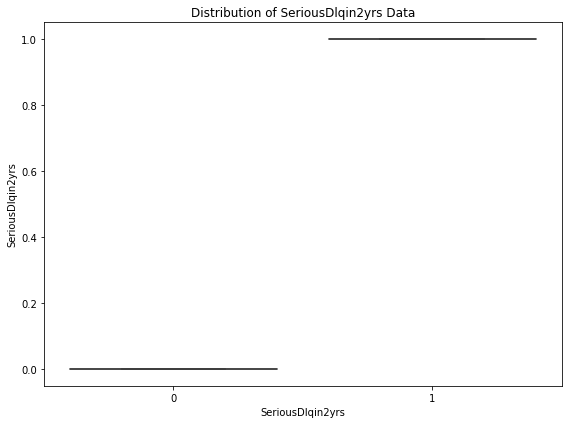

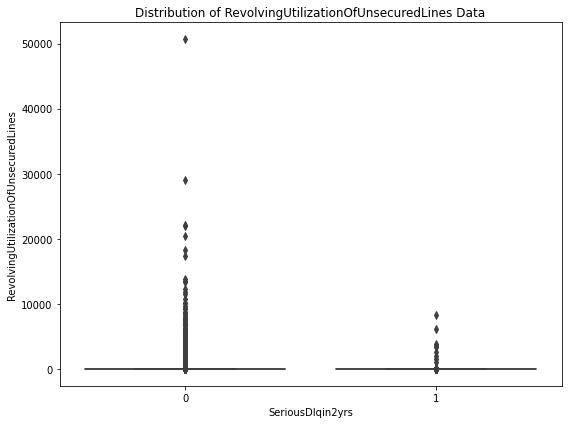

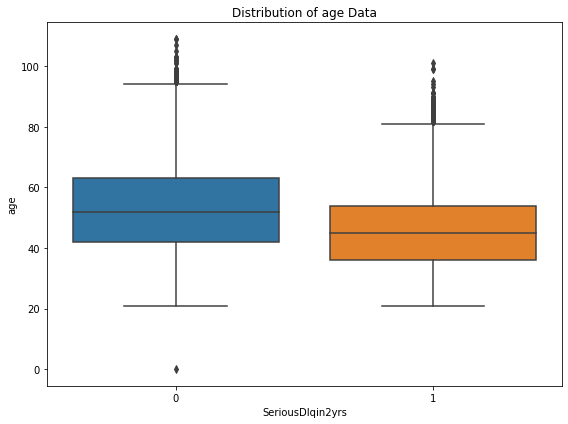

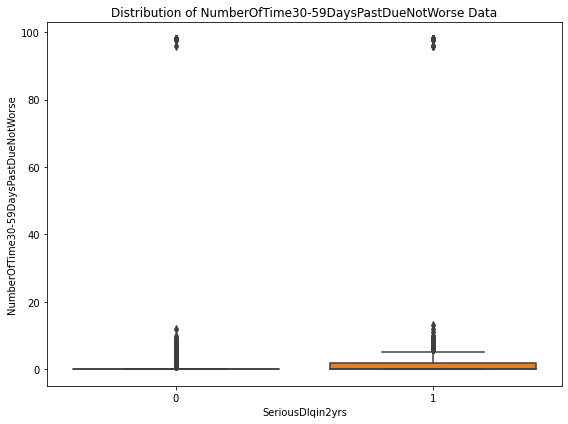

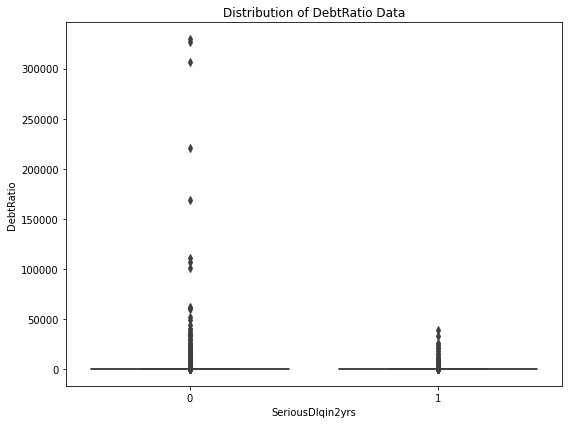

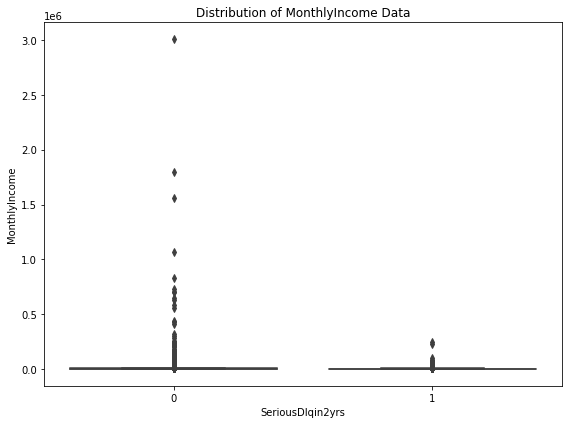

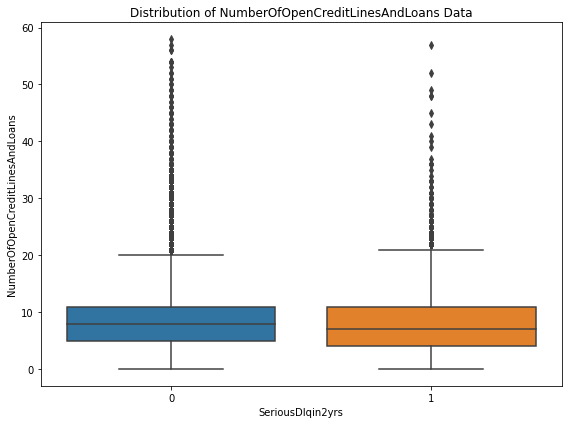

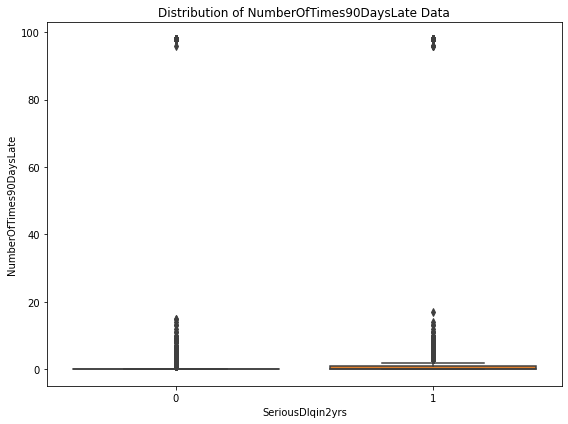

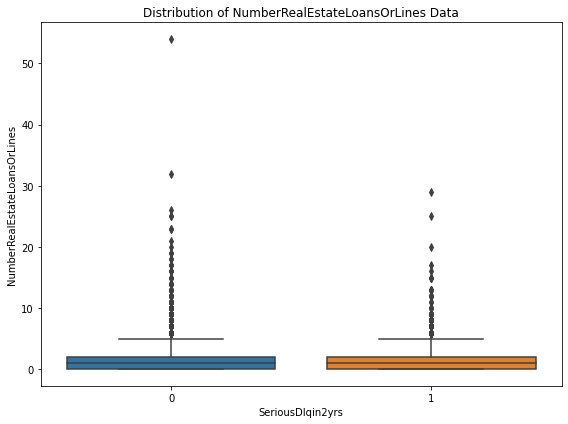

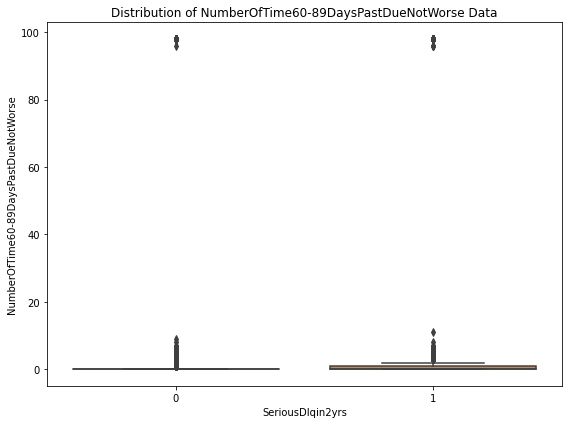

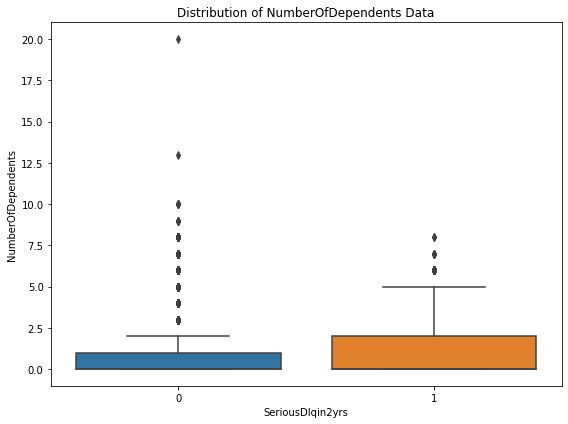

In [12]:
for i,col in enumerate(credit_data.columns,1):
    plt.figure(figsize=(8,6))
    plt.title(f"Distribution of {col} Data")
    sns.boxplot(data=credit_data, x="SeriousDlqin2yrs", y=col)
    plt.tight_layout()
    plt.show()
    

In [13]:
credit_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

### Data Preprocessing

In [14]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [15]:
credit_data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [16]:
credit_data[credit_data['MonthlyIncome'].isnull()]['SeriousDlqin2yrs'].value_counts()

0    28062
1     1669
Name: SeriousDlqin2yrs, dtype: int64

Variable: RevolvingUtilizationOfUnsecuredLines
Stats Binning:                                      [intervalStart intervalEnd)  nsamples  \
RevolvingUtilizationOfUnsecuredLines                                         
0                                              -inf        275.0  149785.0   
1                                             275.0       3825.0     147.0   
2                                            3825.0       8497.0      46.0   
3                                            8497.0          inf      22.0   

                                         bads  bad_rate  dist_obs  dist_bads  \
RevolvingUtilizationOfUnsecuredLines                                           
0                                     10016.0  0.066869  0.998567   0.999003   
1                                         8.0  0.054422  0.000980   0.000798   
2                                         2.0  0.043478  0.000307   0.000199   
3                                         0.0  0.000000  0.000147   0

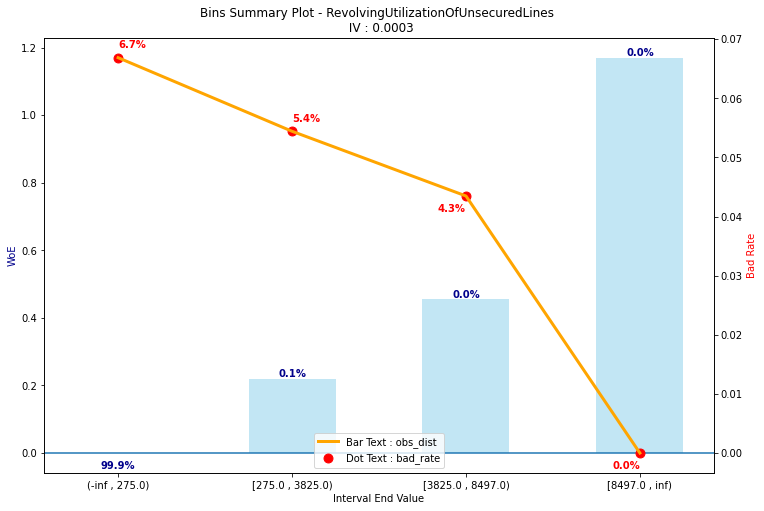


Variable: age
Stats Binning:     [intervalStart intervalEnd)  nsamples    bads  bad_rate  dist_obs  \
age                                                                     
0             -inf         34.0   17085.0  1940.0  0.113550  0.113900   
1             34.0         44.0   27424.0  2553.0  0.093094  0.182827   
2             44.0         54.0   36509.0  2848.0  0.078008  0.243393   
3             54.0         58.0   13941.0   854.0  0.061258  0.092940   
4             58.0         68.0   31439.0  1300.0  0.041350  0.209593   
5             68.0          inf   23602.0   531.0  0.022498  0.157347   

     dist_bads    goods  dist_goods       woe    iv_grp  
age                                                      
0     0.193497  15145.0    0.108199 -0.581293  0.049583  
1     0.254638  24871.0    0.177683 -0.359842  0.027692  
2     0.284061  33661.0    0.240480 -0.166552  0.007259  
3     0.085179  13087.0    0.093496  0.093168  0.000775  
4     0.129663  30139.0    0.215319  

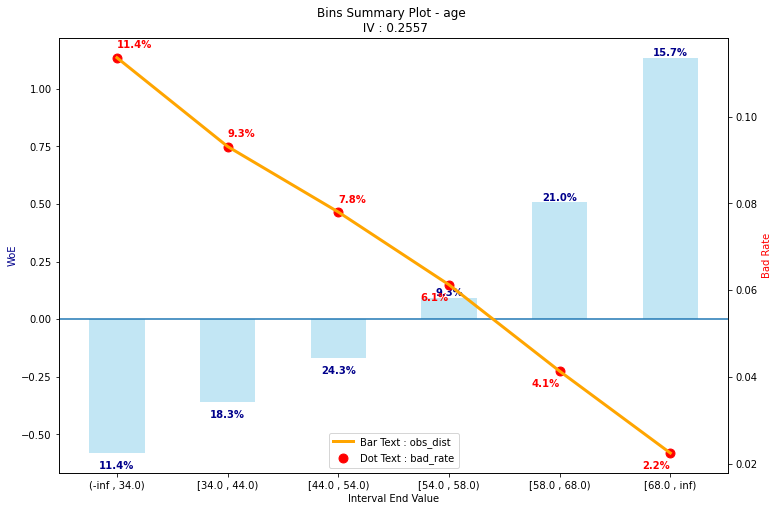


Variable: NumberOfTime30-59DaysPastDueNotWorse
Stats Binning:                                      [intervalStart intervalEnd)  nsamples  \
NumberOfTime30-59DaysPastDueNotWorse                                         
0                                              -inf          1.0  126018.0   
1                                               1.0          2.0   16033.0   
2                                               2.0          3.0    4598.0   
3                                               3.0          4.0    1754.0   
4                                               4.0          6.0    1089.0   
5                                               6.0          inf     508.0   

                                        bads  bad_rate  dist_obs  dist_bads  \
NumberOfTime30-59DaysPastDueNotWorse                                          
0                                     5041.0  0.040002  0.840120   0.502793   
1                                     2409.0  0.150253  0.106887   0.240275

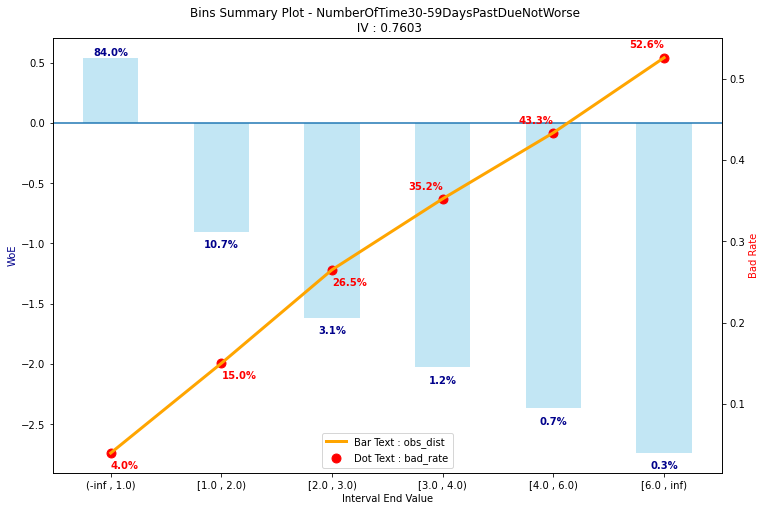


Variable: DebtRatio
Stats Binning:           [intervalStart intervalEnd)  nsamples    bads  bad_rate  dist_obs  \
DebtRatio                                                                     
0                   -inf      2.6e-05    4113.0   340.0  0.082665  0.027420   
1                2.6e-05  3.973377704  115818.0  8028.0  0.069316  0.772120   
2            3.973377704        806.0   11800.0   744.0  0.063051  0.078667   
3                  806.0        996.0    1344.0    84.0  0.062500  0.008960   
4                  996.0       1123.0     894.0    44.0  0.049217  0.005960   
5                 1123.0          inf   16031.0   786.0  0.049030  0.106873   

           dist_bads     goods  dist_goods       woe    iv_grp  
DebtRatio                                                       
0           0.033912    3773.0    0.026955 -0.229595  0.001597  
1           0.800718  107790.0    0.770072 -0.039026  0.001196  
2           0.074207   11056.0    0.078986  0.062413  0.000298  
3     

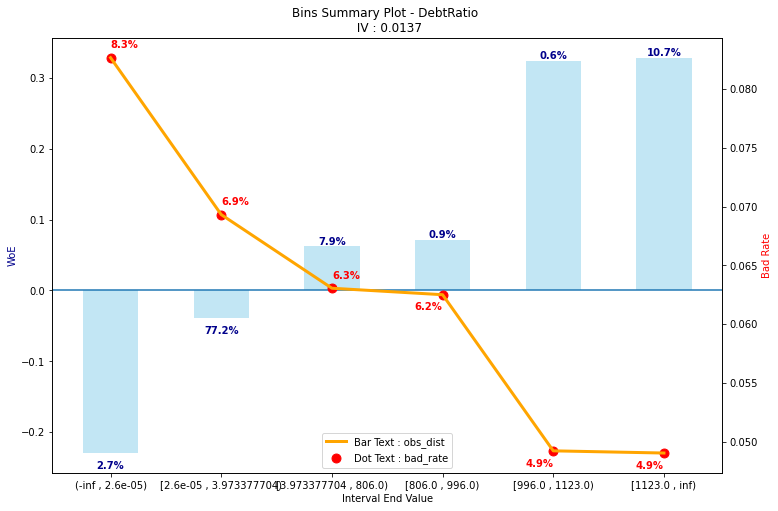


Variable: MonthlyIncome
Stats Binning:               [intervalStart intervalEnd)  nsamples    bads  bad_rate  \
MonthlyIncome                                                           
0                       -inf       3332.0   28890.0  2671.0  0.092454   
1                     3332.0       4834.0   22953.0  1897.0  0.082647   
2                     4834.0       6644.0   23608.0  1609.0  0.068155   
3                     6644.0       7922.0   11964.0   657.0  0.054915   
4                     7922.0       9832.0   12502.0   641.0  0.051272   
5                     9832.0      Missing   20352.0   882.0  0.043337   
6                    Missing          inf   29731.0  1669.0  0.056137   

               dist_obs  dist_bads    goods  dist_goods       woe    iv_grp  
MonthlyIncome                                                                
0              0.192600   0.266407  26219.0    0.187313 -0.352244  0.027860  
1              0.153020   0.189208  21056.0    0.150428 -0.229363  0

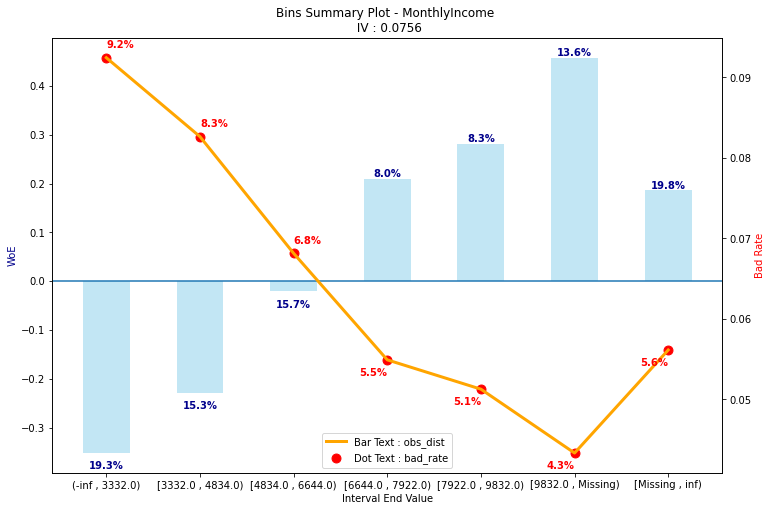


Variable: NumberOfOpenCreditLinesAndLoans
Stats Binning:                                 [intervalStart intervalEnd)  nsamples    bads  \
NumberOfOpenCreditLinesAndLoans                                                 
0                                         -inf          2.0    6326.0  1069.0   
1                                          2.0          3.0    6666.0   609.0   
2                                          3.0          4.0    9058.0   682.0   
3                                          4.0          5.0   11609.0   743.0   
4                                          5.0          6.0   12931.0   819.0   
5                                          6.0          inf  103410.0  6104.0   

                                 bad_rate  dist_obs  dist_bads    goods  \
NumberOfOpenCreditLinesAndLoans                                           
0                                0.168985  0.042173   0.106623   5257.0   
1                                0.091359  0.044440   0.060742   605

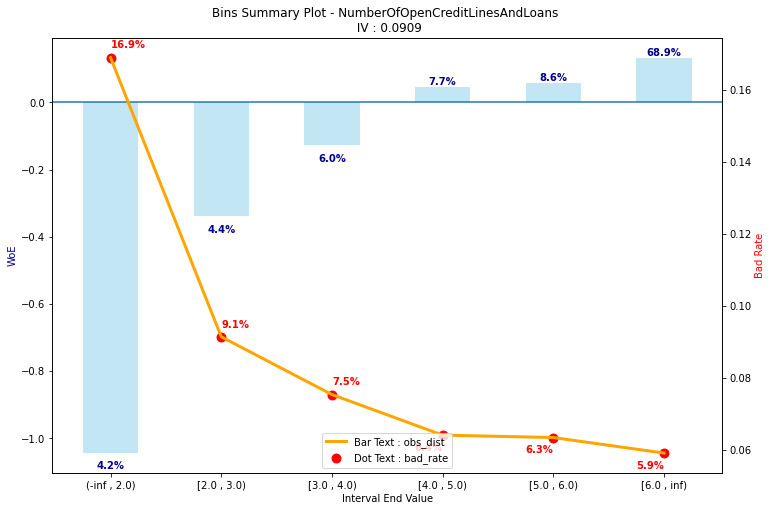


Variable: NumberOfTimes90DaysLate
Stats Binning:                         [intervalStart intervalEnd)  nsamples    bads  \
NumberOfTimes90DaysLate                                                 
0                                 -inf          1.0  141662.0  6554.0   
1                                  1.0          2.0    5243.0  1765.0   
2                                  2.0          3.0    1555.0   776.0   
3                                  3.0          4.0     667.0   385.0   
4                                  4.0          inf     873.0   546.0   

                         bad_rate  dist_obs  dist_bads     goods  dist_goods  \
NumberOfTimes90DaysLate                                                        
0                        0.046265  0.944413   0.653700  135108.0    0.965236   
1                        0.336639  0.034953   0.176042    3478.0    0.024847   
2                        0.499035  0.010367   0.077399     779.0    0.005565   
3                        0.577211  0.0

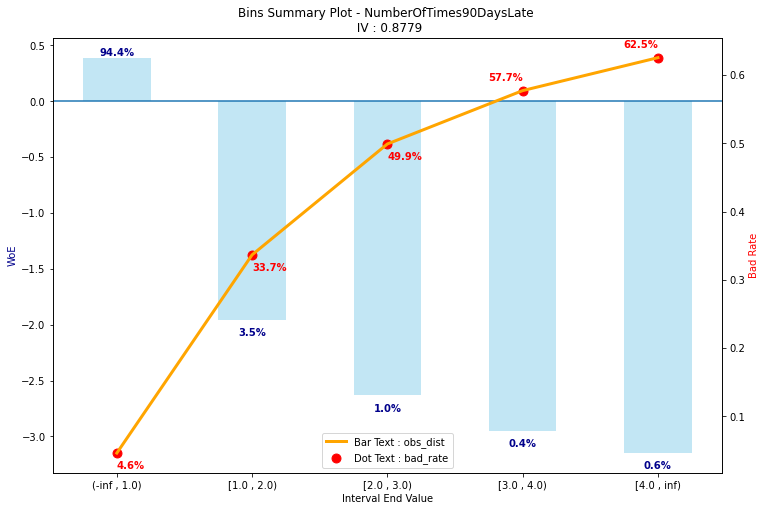


Variable: NumberRealEstateLoansOrLines
Stats Binning:                              [intervalStart intervalEnd)  nsamples    bads  \
NumberRealEstateLoansOrLines                                                 
0                                      -inf          1.0   56188.0  4672.0   
1                                       1.0         32.0   93810.0  5354.0   
2                                      32.0          inf       2.0     0.0   

                              bad_rate  dist_obs  dist_bads    goods  \
NumberRealEstateLoansOrLines                                           
0                             0.083149  0.374587   0.465988  51516.0   
1                             0.057073  0.625400   0.534012  88456.0   
2                             0.000000  0.000013   0.000000      2.0   

                              dist_goods       woe    iv_grp  
NumberRealEstateLoansOrLines                                  
0                               0.368040 -0.235970  0.023113  
1   

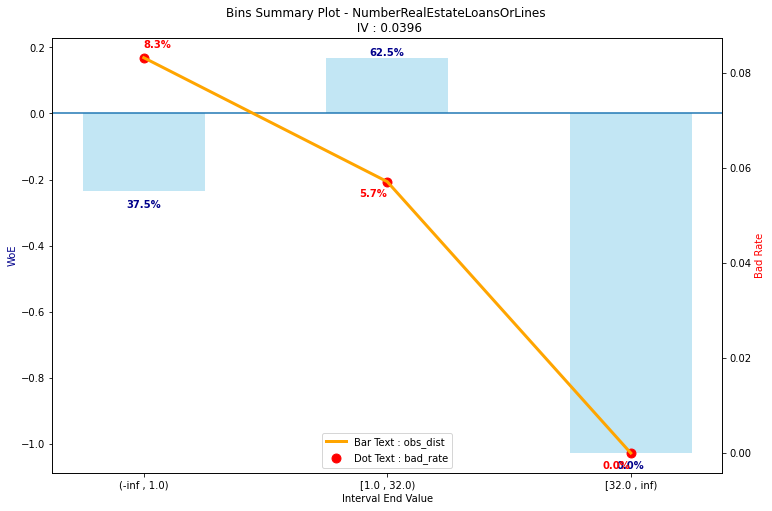


Variable: NumberOfTime60-89DaysPastDueNotWorse
Stats Binning:                                      [intervalStart intervalEnd)  nsamples  \
NumberOfTime60-89DaysPastDueNotWorse                                         
0                                              -inf          1.0  142396.0   
1                                               1.0          2.0    5731.0   
2                                               2.0          3.0    1118.0   
3                                               3.0          4.0     318.0   
4                                               4.0          inf     437.0   

                                        bads  bad_rate  dist_obs  dist_bads  \
NumberOfTime60-89DaysPastDueNotWorse                                          
0                                     7256.0  0.050956  0.949307   0.723718   
1                                     1777.0  0.310068  0.038207   0.177239   
2                                      561.0  0.501789  0.007453   0.05595

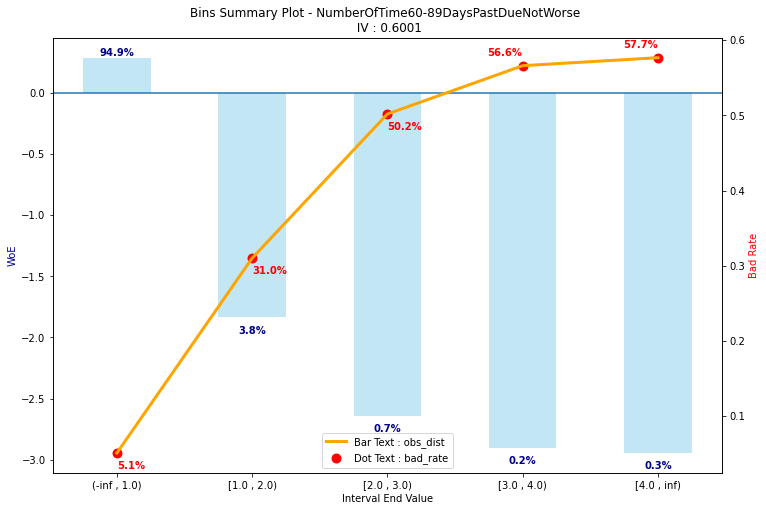


Variable: NumberOfDependents
Stats Binning:                    [intervalStart intervalEnd)  nsamples    bads  bad_rate  \
NumberOfDependents                                                           
0                            -inf          1.0   86902.0  5095.0  0.058629   
1                             1.0          2.0   26316.0  1935.0  0.073529   
2                             2.0          3.0   19522.0  1584.0  0.081139   
3                             3.0          4.0    9483.0   837.0  0.088263   
4                             4.0          6.0    3608.0   365.0  0.101164   
5                             6.0      Missing     245.0    31.0  0.126531   
6                         Missing          inf    3924.0   179.0  0.045617   

                    dist_obs  dist_bads    goods  dist_goods       woe  \
NumberOfDependents                                                       
0                   0.579347   0.508179  81807.0    0.584444  0.139828   
1                   0.175440  

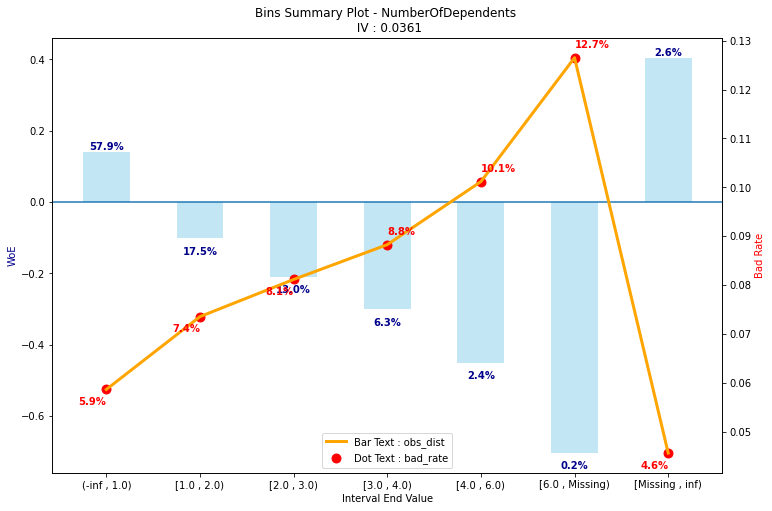

In [17]:
results = {}

# Define the parameters for the binning constraints
binning_constraints = {
    'max_bins': 6,
    'min_bins': 3,
    'max_samples': 0.4,
    'min_samples': 0.1,
    'min_bads': 0.05,
    'init_pvalue': 0.4,
    'maximize_bins': True
}

# Loop through all variables in the DataFrame (excluding the response variable)
response_variable = 'SeriousDlqin2yrs'
for var in credit_data.columns:
    if var != response_variable:  # Exclude the response variable
        try:
            # Initialize the MOB algorithm for the variable
            MOB_ALGO = MOB(data=credit_data, var=var, response=response_variable, exclude_value=None)
            
            # Set the binning constraints
            MOB_ALGO.setBinningConstraints(**binning_constraints)
            
            # Execute the MOB algorithm with different merge methods
            stats_binning = MOB_ALGO.runMOB(mergeMethod='Stats')
            
            # Store the results in the dictionary
            results[var] = {
                'StatsBinning': stats_binning
            }
        
        except Exception as e:
            print(f"Error processing variable {var}: {e}")

# Access results for each variable
for var, bins in results.items():
    print(f"Variable: {var}")
    print(f"Stats Binning: {bins['StatsBinning']}")
    MOB_PLOT.plotBinsSummary(monoOptBinTable = bins['StatsBinning'])
    print()

In [95]:
results['MonthlyIncome']['StatsBinning']

,[intervalStart,intervalEnd),nsamples,bads,bad_rate,dist_obs,dist_bads,goods,dist_goods,woe,iv_grp,category
MonthlyIncome,,,,,,,,,,,,
0,-inf,3332.0,28890.0,2671.0,0.092454,0.192600,0.266407,26219.0,0.187313,-0.352244,0.027860,"[-inf,3332.0)"
1,3332.0,4834.0,22953.0,1897.0,0.082647,0.153020,0.189208,21056.0,0.150428,-0.229363,0.008895,"[3332.0,4834.0)"
2,4834.0,6644.0,23608.0,1609.0,0.068155,0.157387,0.160483,21999.0,0.157165,-0.020891,0.000069,"[4834.0,6644.0)"
3,6644.0,7922.0,11964.0,657.0,0.054915,0.079760,0.065530,11307.0,0.080779,0.209218,0.003191,"[6644.0,7922.0)"
4,7922.0,9832.0,12502.0,641.0,0.051272,0.083347,0.063934,11861.0,0.084737,0.281707,0.005860,"[7922.0,9832.0)"
5,9832.0,Missing,20352.0,882.0,0.043337,0.135680,0.087971,19470.0,0.139097,0.458163,0.023424,"[9832.0,Missing)"
6,Missing,inf,29731.0,1669.0,0.056137,0.198207,0.166467,28062.0,0.200480,0.185917,0.006324,"[Missing,inf)"


In [93]:
for var, item in results.items():
    bins = list(item['StatsBinning']['intervalEnd)'])
    bins.insert(0,item['StatsBinning']['[intervalStart'][0])
    labels = list(item['StatsBinning']['category'])
    print(bins)
    credit_data[f'{var}_cat'] = pd.cut(credit_data[var], bins=bins, labels=labels, right=False)


[-inf, '275.0', '3825.0', '8497.0', inf]
[-inf, '34.0', '44.0', '54.0', '58.0', '68.0', inf]
[-inf, '1.0', '2.0', '3.0', '4.0', '6.0', inf]
[-inf, '2.6e-05', '3.973377704', '806.0', '996.0', '1123.0', inf]
[-inf, '3332.0', '4834.0', '6644.0', '7922.0', '9832.0', 'Missing', inf]


ValueError: could not convert string to float: 'Missing'

In [56]:
credit_data['age']

1         45
2         40
3         38
4         30
5         49
          ..
149996    74
149997    44
149998    58
149999    30
150000    64
Name: age, Length: 150000, dtype: int64

In [59]:
train, test = train_test_split(credit_data, test_size=0.3,random_state=31122024)

In [61]:
train_target = train.pop('SeriousDlqin2yrs')
test_target = test.pop('SeriousDlqin2yrs')

In [111]:
weights={0:1.,1:5.}

In [112]:
clf=LogisticRegression(solver='liblinear',class_weight=weights)
clf.fit(train,train_target)

LogisticRegression(class_weight={0: 1.0, 1: 5.0}, solver='liblinear')

In [113]:
y_pred=clf.predict(test)
print(classification_report(test_target,y_pred))
roc_auc_score(test_target,y_pred)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     42022
           1       0.41      0.19      0.26      2978

    accuracy                           0.93     45000
   macro avg       0.68      0.59      0.61     45000
weighted avg       0.91      0.93      0.92     45000



0.5875169116538432

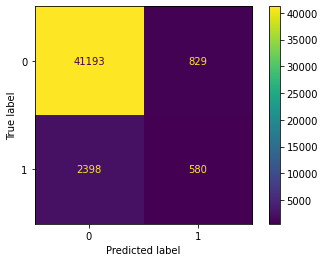

In [114]:
cm_log=confusion_matrix(test_target,y_pred,labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_log,display_labels=clf.classes_)
disp.plot()

In [115]:
forest=RandomForestClassifier(n_estimators=40,random_state=31122024,max_depth=7, class_weight=weights)
forest=forest.fit(train,train_target)

In [ ]:
plot_dist('NumberOfTime30-59DaysPastDueNotWorse', 'Delinquency between 30 -59 days')

In [117]:
feature_names=train.columns
feature_importance_forest=pd.DataFrame(forest.feature_importances_,index=feature_names)
feature_importance_forest[0].nlargest(10)

NumberOfTimes90DaysLate                 0.328797
RevolvingUtilizationOfUnsecuredLines    0.238534
NumberOfTime30-59DaysPastDueNotWorse    0.205510
NumberOfTime60-89DaysPastDueNotWorse    0.130687
age                                     0.035243
NumberOfOpenCreditLinesAndLoans         0.019383
DebtRatio                               0.019123
MonthlyIncome                           0.010924
NumberRealEstateLoansOrLines            0.008994
NumberOfDependents                      0.002804
Name: 0, dtype: float64

In [118]:
predictions=forest.predict(test)
np.bincount(predictions)
print(classification_report(y_true=test_target,y_pred=predictions,target_names=['No Serious Delinquencies','Serious Delinquencies']))
roc_auc_score(test_target,predictions)

                          precision    recall  f1-score   support

No Serious Delinquencies       0.96      0.94      0.95     42022
   Serious Delinquencies       0.39      0.50      0.44      2978

                accuracy                           0.91     45000
               macro avg       0.67      0.72      0.69     45000
            weighted avg       0.93      0.91      0.92     45000



0.7216087904832478

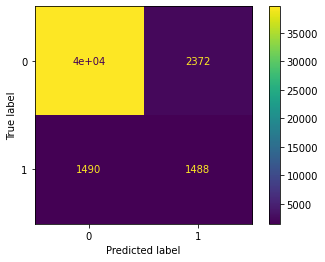

In [119]:
cm=confusion_matrix(test_target,predictions,labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest.classes_)
disp.plot()